In [ ]:
#Twitter sentyment analysis


In [1]:
pip install tweepy

In [2]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:

# Authenticate to Twitter
consumer_key = "A6kKlMRkA4h7rX2h5ID6mzoDk"
consumer_secret = "NMVddzFAdHQ7EVFIrONomiK3y8uvhPfCCvEPwQ1r8zwaP2RPtl"
access_token = "1345775473306046466-Ip1GfAU3eJUvP0brUZ73SvVkdmEbIo"
access_token_secret = "P9bTSg1PpxvfUV6vLrbgBWQQwp6r5ou6U1DwjnWiOHXDG"



auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)


api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [4]:
# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [ ]:
#Gather 2000 tweets about bitcoin and filter out any retweets "RT"
search_term= "#bitcoin - filter:retweets"

#Create cursos object
tweets = tweepy.Cursor(api.search, q=search_term, lang="en", since="2020-8-2", tweet_mode="extended").items(1000)

#Store the tweets in a variable and get the full text
all_tweets= [tweet.full_text for tweet in tweets]

#until="2018-1-20"


Rate limit reached. Sleeping for: 687


In [34]:
#Create a dataframe to store the tweets with a column called "Tweets"
df = pd.DataFrame(all_tweets, columns=["Tweets"])
df.head(n=5)

,Tweets
0,RT @karka_lawrence: Free trade skills?\n\n$250...
1,RT @BTC_Archive: eBay is coming to #Bitcoin \n...
2,RT @BTC_Archive: #Bitcoin supply on exchanges ...
3,RT @CryptoMichNL: Peak high bull cycle predict...
4,RT @flurbnb: 🚀 $300 to someone who retweets th...


In [35]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub("#bitcoin", "bitcoin", twt) # removes the # from bitcoin
  twt = re.sub("#Bitcoin", "Bitcoin", twt) # removes the # from Bitcoin
  twt = re.sub("#[A-Za-z0-9]+","", twt) # removes any strings whith a #
  twt = re.sub("\\n","", twt) # removes the "\n" string
  twt = re.sub("https?:\/\/\S+", "", twt) # removes any hyperlinks
  return twt

In [36]:
#Clean the tweets
df["Cleaned_Tweets"] = df["Tweets"].apply(cleanTwt)

# Show the data set
df.head(10)

,Tweets,Cleaned_Tweets
0,RT @karka_lawrence: Free trade skills?\n\n$250...,RT @karka_lawrence: Free trade skills?$250 bit...
1,RT @BTC_Archive: eBay is coming to #Bitcoin \n...,RT @BTC_Archive: eBay is coming to Bitcoin Ama...
2,RT @BTC_Archive: #Bitcoin supply on exchanges ...,RT @BTC_Archive: Bitcoin supply on exchanges s...
3,RT @CryptoMichNL: Peak high bull cycle predict...,RT @CryptoMichNL: Peak high bull cycle predict...
4,RT @flurbnb: 🚀 $300 to someone who retweets th...,RT @flurbnb: 🚀 $300 to someone who retweets th...
5,RT @BTC_Archive: Ebay CEO looking at #Bitcoin ...,RT @BTC_Archive: Ebay CEO looking at Bitcoin a...
6,RT @raypaxful: 6 years ago everyone laughed wh...,RT @raypaxful: 6 years ago everyone laughed wh...
7,RT @coinok: Buy Crypto With Your Credit Card /...,RT @coinok: Buy Crypto With Your Credit Card /...
8,RT @DocumentingBTC: 62% of clients say they wo...,RT @DocumentingBTC: 62% of clients say they wo...
9,RT @freeskinscom: 🔽 What is https://t.co/pBlBw...,RT @freeskinscom: 🔽 What is 🔽On Freeskins you...


In [37]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called "subjectivity" and "Polarity"
df["Subjectivity"]= df["Cleaned_Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Cleaned_Tweets"].apply(getPolarity)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,RT @karka_lawrence: Free trade skills?\n\n$250...,RT @karka_lawrence: Free trade skills?$250 bit...,0.800000,0.400000
1,RT @BTC_Archive: eBay is coming to #Bitcoin \n...,RT @BTC_Archive: eBay is coming to Bitcoin Ama...,1.000000,0.000000
2,RT @BTC_Archive: #Bitcoin supply on exchanges ...,RT @BTC_Archive: Bitcoin supply on exchanges s...,0.177778,-0.077778
3,RT @CryptoMichNL: Peak high bull cycle predict...,RT @CryptoMichNL: Peak high bull cycle predict...,0.520000,0.330000
4,RT @flurbnb: 🚀 $300 to someone who retweets th...,RT @flurbnb: 🚀 $300 to someone who retweets th...,0.000000,0.000000


In [38]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"      

In [39]:
#Create a column to store the text sentiment
df["Sentiment"] = df["Polarity"].apply(getSentiment)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,RT @karka_lawrence: Free trade skills?\n\n$250...,RT @karka_lawrence: Free trade skills?$250 bit...,0.800000,0.400000,Positive
1,RT @BTC_Archive: eBay is coming to #Bitcoin \n...,RT @BTC_Archive: eBay is coming to Bitcoin Ama...,1.000000,0.000000,Neutral
2,RT @BTC_Archive: #Bitcoin supply on exchanges ...,RT @BTC_Archive: Bitcoin supply on exchanges s...,0.177778,-0.077778,Negative
3,RT @CryptoMichNL: Peak high bull cycle predict...,RT @CryptoMichNL: Peak high bull cycle predict...,0.520000,0.330000,Positive
4,RT @flurbnb: 🚀 $300 to someone who retweets th...,RT @flurbnb: 🚀 $300 to someone who retweets th...,0.000000,0.000000,Neutral


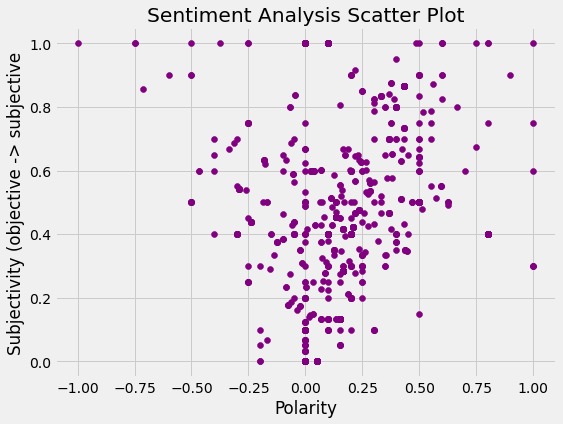

In [40]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Purple")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity (objective -> subjective")
plt.show()

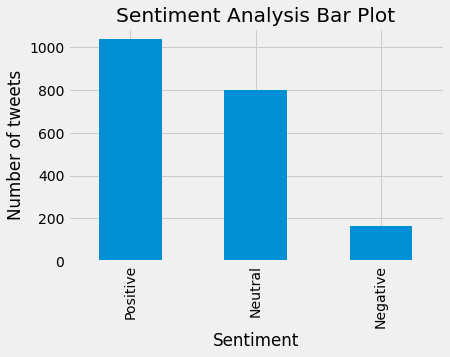

In [25]:
#Create a bar chart to show the count of Positive, Neutral, and Negative sentiments
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Number of tweets")
plt.show()
